<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML8_ponto_de_partida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Vamos empregar R?**
---



# R no Colab

> **R**, Entre no Browser: **`colab.to/r`**

>> `head(iris)`

> **Python + R**, Entre no Colab

>> `%load_ext rpy2.ipython`

>> %%R

>> `head(iris)`




# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
# suporte a execução de células em R
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('MASS')
library(MASS)

# Built in Data Sets

In [10]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [47]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
%%R
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [12]:
%%R
head(biopsy) # from MASS

       ID V1 V2 V3 V4 V5 V6 V7 V8 V9     class
1 1000025  5  1  1  1  2  1  3  1  1    benign
2 1002945  5  4  4  5  7 10  3  2  1    benign
3 1015425  3  1  1  1  2  2  3  1  1    benign
4 1016277  6  8  8  1  3  4  3  7  1    benign
5 1017023  4  1  1  3  2  1  3  1  1    benign
6 1017122  8 10 10  8  7 10  9  7  1 malignant


# Aquisição de Dados 



In [6]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
%%R
df = read.csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')
head(df)

  age    sex    bmi children smoker    region   charges
1  19 female 27.900        0    yes southwest 16884.924
2  18   male 33.770        1     no southeast  1725.552
3  28   male 33.000        3     no southeast  4449.462
4  33   male 22.705        0     no northwest 21984.471
5  32   male 28.880        0     no northwest  3866.855
6  31 female 25.740        0     no southeast  3756.622


# Exploração da Estrutura dos Dados

In [14]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')

print(df.head())
print()
print(df.shape)
print()
print(len(df))
print()
print(df.columns)
print()
print(df.describe(include='all'))
print()
print(df.isnull().sum())
print()


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

(1338, 7)

1338

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN  

In [21]:
%%R
df = read.csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')

print(head(df))
cat('\n')
print(ncol(df))
cat('\n')
print(nrow(df))
cat('\n')
print(names(df))
cat('\n')
print(summary(df))
cat('\n')
print(colSums(is.na(df))) # see https://www.codingprof.com/3-ways-to-find-columns-with-nas-in-r-examples/
cat('\n')

  age    sex    bmi children smoker    region   charges
1  19 female 27.900        0    yes southwest 16884.924
2  18   male 33.770        1     no southeast  1725.552
3  28   male 33.000        3     no southeast  4449.462
4  33   male 22.705        0     no northwest 21984.471
5  32   male 28.880        0     no northwest  3866.855
6  31 female 25.740        0     no southeast  3756.622

[1] 7

[1] 1338

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges" 

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region   

# Drop na


In [39]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')

df.at[1,'sex'] = np.NAN
print(df.head())
print(len(df))
print(df.isnull().sum())

df = df.dropna()
print(len(df))
print(df.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18     NaN  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
1338
age         0
sex         1
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1337
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [41]:
%%R
df = read.csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')

df[1,'sex'] = NA
print(head(df))
print(nrow(df))
print(colSums(is.na(df)))

df = na.omit(df)
print(nrow(df))
print(colSums(is.na(df)))

  age    sex    bmi children smoker    region   charges
1  19   <NA> 27.900        0    yes southwest 16884.924
2  18   male 33.770        1     no southeast  1725.552
3  28   male 33.000        3     no southeast  4449.462
4  33   male 22.705        0     no northwest 21984.471
5  32   male 28.880        0     no northwest  3866.855
6  31 female 25.740        0     no southeast  3756.622
[1] 1338
     age      sex      bmi children   smoker   region  charges 
       0        1        0        0        0        0        0 
[1] 1337
     age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0 


In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')

df.at[1,'sex'] = np.NAN
print(len(df))
print(df.isnull().sum())

df = df.dropna()
print(len(df))
print(df.isnull().sum())

# Selecionando uma Coluna

In [45]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/tips.csv')

print(df.head())

print(df.tip.mean())
print(df['tip'].max())
print(df['day'].value_counts())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
2.99827868852459
10.0
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


In [46]:
%%R
df = read.csv('http://meusite.mackenzie.br/rogerio/data_load/tips.csv')

print(head(df))

print(mean( df$tip ))
print(max( df[,'tip'] ))
print(table(df[,'day']))

  total_bill  tip    sex smoker day   time size
1      16.99 1.01 Female     No Sun Dinner    2
2      10.34 1.66   Male     No Sun Dinner    3
3      21.01 3.50   Male     No Sun Dinner    3
4      23.68 3.31   Male     No Sun Dinner    2
5      24.59 3.61 Female     No Sun Dinner    4
6      25.29 4.71   Male     No Sun Dinner    4
[1] 2.998279
[1] 10

 Fri  Sat  Sun Thur 
  19   87   76   62 


# Seleções dos Dados

> **R**, `df[ <linhas> ,  <colunas> ]`

> **Python**, `df[ <linhas> ] | [ <colunas> ]`



## Seleção de Colunas

In [48]:
iris = sns.load_dataset('iris')
print( iris.head() )

iris[ ['sepal_width', 'species'] ]

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_width,species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa
3,3.1,setosa
4,3.6,setosa
...,...,...
145,3.0,virginica
146,2.5,virginica
147,3.0,virginica
148,3.4,virginica


In [49]:
%%R
# iris[ , c(2,5)]
iris[ , c('Sepal.Width', 'Species')]

    Sepal.Width    Species
1           3.5     setosa
2           3.0     setosa
3           3.2     setosa
4           3.1     setosa
5           3.6     setosa
6           3.9     setosa
7           3.4     setosa
8           3.4     setosa
9           2.9     setosa
10          3.1     setosa
11          3.7     setosa
12          3.4     setosa
13          3.0     setosa
14          3.0     setosa
15          4.0     setosa
16          4.4     setosa
17          3.9     setosa
18          3.5     setosa
19          3.8     setosa
20          3.8     setosa
21          3.4     setosa
22          3.7     setosa
23          3.6     setosa
24          3.3     setosa
25          3.4     setosa
26          3.0     setosa
27          3.4     setosa
28          3.5     setosa
29          3.4     setosa
30          3.2     setosa
31          3.1     setosa
32          3.4     setosa
33          4.1     setosa
34          4.2     setosa
35          3.1     setosa
36          3.2     setosa
3

# Seleção de Linhas

In [50]:
iris[ iris.species == 'virginica' ] 

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


In [52]:
%%R
# R, df[ <linhas> , <colunas> ]
iris[ iris$Species == 'virginica' , ]

    Sepal.Length Sepal.Width Petal.Length Petal.Width   Species
101          6.3         3.3          6.0         2.5 virginica
102          5.8         2.7          5.1         1.9 virginica
103          7.1         3.0          5.9         2.1 virginica
104          6.3         2.9          5.6         1.8 virginica
105          6.5         3.0          5.8         2.2 virginica
106          7.6         3.0          6.6         2.1 virginica
107          4.9         2.5          4.5         1.7 virginica
108          7.3         2.9          6.3         1.8 virginica
109          6.7         2.5          5.8         1.8 virginica
110          7.2         3.6          6.1         2.5 virginica
111          6.5         3.2          5.1         2.0 virginica
112          6.4         2.7          5.3         1.9 virginica
113          6.8         3.0          5.5         2.1 virginica
114          5.7         2.5          5.0         2.0 virginica
115          5.8         2.8          5.

## Empregue Seleções como um DataFrame

In [53]:
len( iris[ iris.petal_length > iris.petal_length.mean() ] ) / len( iris )

0.62

In [55]:
my_iris = iris[ iris.petal_length > iris.petal_length.mean() ]
len( my_iris ) / len( iris )

0.62

In [54]:
%%R
nrow( iris[ iris$Petal.Length  >  mean(iris$Petal.Length) , ] )  /  nrow( iris )

[1] 0.62


In [57]:
%%R
my_iris = iris[ iris$Petal.Length  >  mean(iris$Petal.Length) , ] 
nrow( my_iris )  /  nrow( iris )

[1] 0.62


## Seleção de Linhas e Colunas

In [ ]:
iris[ iris.petal_length > iris.petal_length.mean() ][['sepal_length']]

,sepal_length
50,7.0
51,6.4
52,6.9
53,5.5
54,6.5
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
%%R
iris[ iris$Petal.Length  >  mean(iris$Petal.Length) , c('Sepal.Length') ]

 [1] 7.0 6.4 6.9 5.5 6.5 5.7 6.3 6.6 5.2 5.9 6.0 6.1 6.7 5.6 5.8 6.2 5.6 5.9 6.1
[20] 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5 5.5 6.1 5.8
[39] 5.6 5.7 5.7 6.2 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7
[58] 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4
[77] 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9


### Lembre-se, Listas em Python e R...

> **R**, `c('Sepal.Length','Species') `

> **Python**, `['Sepal.Length','Species')]`

In [ ]:
iris[ iris.petal_length > iris.petal_length.mean() ][['sepal_length', 'species']]

,sepal_length,species
50,7.0,versicolor
51,6.4,versicolor
52,6.9,versicolor
53,5.5,versicolor
54,6.5,versicolor
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [58]:
%%R
iris[ iris$Petal.Length  >  mean(iris$Petal.Length) , c('Sepal.Length','Species') ]

    Sepal.Length    Species
51           7.0 versicolor
52           6.4 versicolor
53           6.9 versicolor
54           5.5 versicolor
55           6.5 versicolor
56           5.7 versicolor
57           6.3 versicolor
59           6.6 versicolor
60           5.2 versicolor
62           5.9 versicolor
63           6.0 versicolor
64           6.1 versicolor
66           6.7 versicolor
67           5.6 versicolor
68           5.8 versicolor
69           6.2 versicolor
70           5.6 versicolor
71           5.9 versicolor
72           6.1 versicolor
73           6.3 versicolor
74           6.1 versicolor
75           6.4 versicolor
76           6.6 versicolor
77           6.8 versicolor
78           6.7 versicolor
79           6.0 versicolor
81           5.5 versicolor
83           5.8 versicolor
84           6.0 versicolor
85           5.4 versicolor
86           6.0 versicolor
87           6.7 versicolor
88           6.3 versicolor
89           5.6 versicolor
90           5.5 ver

In [ ]:
iris[ iris.petal_length > iris.petal_length.mean() ][['sepal_length']].mean()
# ou
iris[ iris.petal_length > iris.petal_length.mean() ]['sepal_length'].mean()
# ou
iris[ iris.petal_length > iris.petal_length.mean() ].sepal_length.mean()

6.337634408602148

In [59]:
%%R
mean( iris[ iris$Petal.Length  >  mean(iris$Petal.Length) , c('Sepal.Length') ] )
# ou
mean( iris[ iris$Petal.Length  >  mean(iris$Petal.Length) , 'Sepal.Length' ] )
# ou
mean( iris[ iris$Petal.Length  >  mean(iris$Petal.Length) , ]$Sepal.Length )

[1] 6.337634


# Gráficos


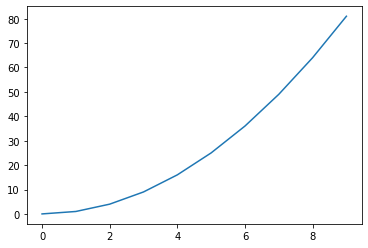

In [69]:
x = np.arange(0,10,1)
y = x**2
plt.plot(x,y)
plt.show()

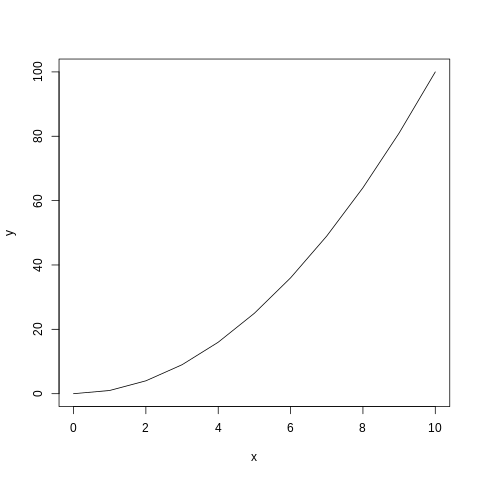

In [72]:
%%R
x =seq(0,10,1)
y = x**2
plot(x,y,type='l')


In [60]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
%%R
df = read.csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')
head(df)

  age    sex    bmi children smoker    region   charges
1  19 female 27.900        0    yes southwest 16884.924
2  18   male 33.770        1     no southeast  1725.552
3  28   male 33.000        3     no southeast  4449.462
4  33   male 22.705        0     no northwest 21984.471
5  32   male 28.880        0     no northwest  3866.855
6  31 female 25.740        0     no southeast  3756.622


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

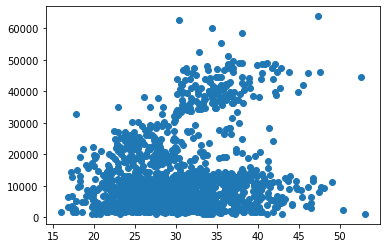

In [63]:
plt.scatter( df.bmi , df.charges )
plt.show()

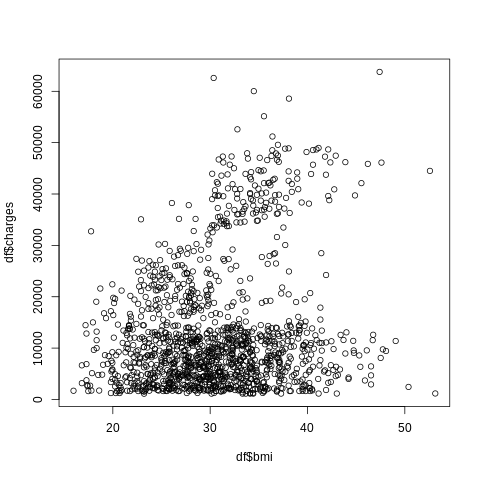

In [64]:
%%R
plot( df$bmi , df$charges )

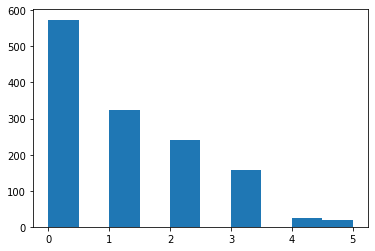

In [65]:
plt.hist( df.children )
plt.show()

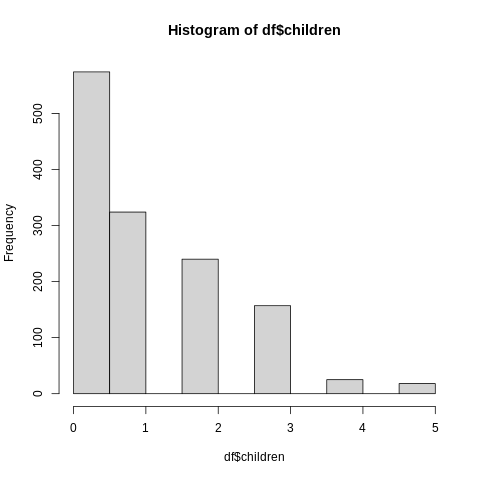

In [66]:
%%R
hist( df$children )